### 히스토그램과 역투영

- 역투영이란 관심 영역의 히스토그램과 유사한 히스토그램을 갖는 영역을 찾아내는 기법
- 역투영을 활용하면 이미지 내에서 특정 물체나 배경을 분리할 수 있습니다.
- 역투영은 알파 채널이나 크로마 키 같은 것이 없어도 복잡한 모양의 사물을 분리할 수 있다는 장점
- 하지만 역투영은 히스토그램을 기반으로 관심 영역의 색상과 비슷한 물체를 추출하므로, 관심 영역의 색상과 비슷한 다른 물체가 뒤섞여 있을 때는 효과가 떨어질 수 있음

![Screenshot from 2024-01-30 17-26-55.png](<attachment:Screenshot from 2024-01-30 17-26-55.png>)

- x,y 는 사각형 좌상단 좌표
- w,h 는 width, height를 의미함


![Screenshot from 2024-01-30 17-30-34.png](<attachment:Screenshot from 2024-01-30 17-30-34.png>)

- 빨간색 사각형은 y축 방향
- 파란색 사각형은 x축 방향
    - 즉 전체 이미지가 아닌 특정 부분을 커버한다는 의미
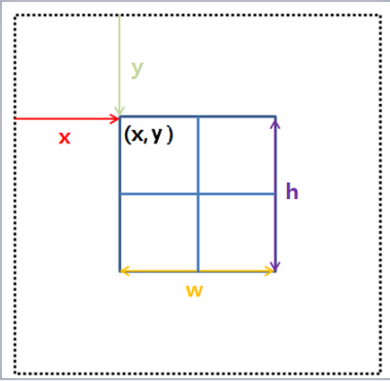
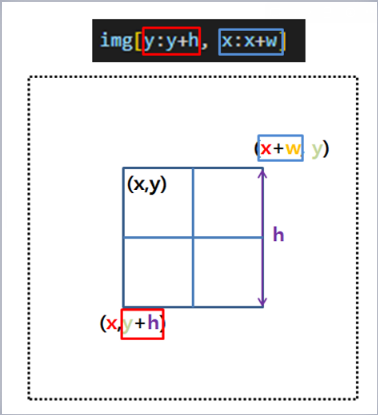

- 정규화 과정
    - 영상에서 특정 부분에 몰려 있는 값을 전체 영역으로 골고루 분포하게 하도록 만드는 방법을 Normalization(정규화) 라고 한다.

In [2]:
import sys 
import numpy as np 
import cv2 

In [4]:
src = cv2.imread('/home/kkyu/amr_ws/opencv/data/lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

# ROI 선택 (관심 영역 지정)
x, y, w, h = cv2.selectROI(src) # 옵션 중 showCrosshair = False라고 하면 이미지를 select할 때 십자가 표시 안함

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1, 2]  # RGB중 G와 R만 선택 
cb_bins = 128
cr_bins = 128
histSize = [cr_bins, cb_bins] # 히스토그램 그래프의 x축의 간격
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range # 측정하고자하는 값의 범위

hist = cv2.calcHist([crop], channels, None, histSize, ranges) # crop이 분석대상할 이미지 임

# cv2.log -> 모든 배열 원소의 절대값에 대한 자연 로그를 계산
# alpha = 0 , beta = 255 , norm_type = cv2.NORM_MINMAX : alpha와 beta 구간으로 정규화하는 cv2.NORM_MINMAX
# dtype = cv2.CV_8U : 8-bit unsigned interger(0..255)

hist_norm = cv2.normalize(cv2.log(hist+1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
dst = cv2.copyTo(src, backproj)

cv2.imshow('backproj', backproj)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
